['New folder', 'sample_submission.csv', 'test.csv', 'test_supplement.csv', 'train.csv', 'train_sample.csv']
LOADING DATA..........................
TRAINING DATA
Loading Completed
original dataframe
dataset columns Index(['ip', 'app', 'device', 'os', 'channel', 'is_attributed', 'day', 'hour'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 8 columns):
ip               1500000 non-null int64
app              1500000 non-null int64
device           1500000 non-null int64
os               1500000 non-null int64
channel          1500000 non-null int64
is_attributed    1500000 non-null int64
day              1500000 non-null int64
hour             1500000 non-null int64
dtypes: int64(8)
memory usage: 91.6 MB
None
Number of rows in the dataframe:  22539
Number of positive cases are 2539
Number of negative cases are 20000


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:          is_attributed   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     301.6
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:33:39   Log-Likelihood:                -1935.1
No. Observations:               10143   AIC:                             3884.
Df Residuals:                   10136   BIC:                             3935.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ip          1.058e-06   5.12e-08     20.653      0.0

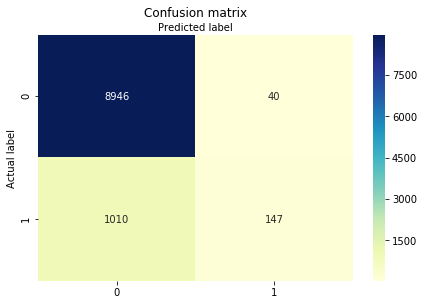

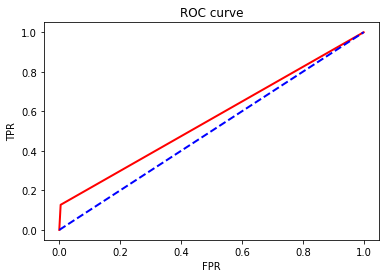

Accuracy: 0.9599723947550034
[[8884  102]
 [ 304  853]]
Accuracy :  0.9599723947550034
Sensitivity :  0.9886490095704429
Specificity :  0.7372515125324114


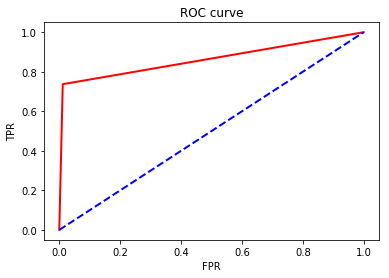

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NameError: name 'df' is not defined

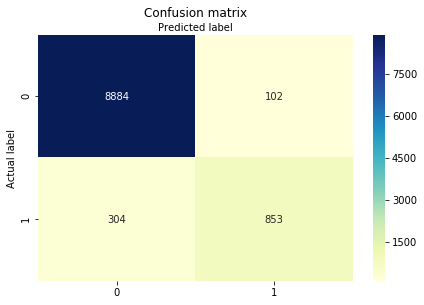

In [1]:
#BACK END 

import pandas as pd
import os
import matplotlib.pyplot as plt
import dask.dataframe as dd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve,recall_score,classification_report,mean_squared_error,confusion_matrix
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split as model_tts
print(os.listdir("data"))

# preset the data types
dtyp = {'ip': np.int64, 'app': np.int16,'device': np.int16,'os': np.int16,'channel': np.int16,'is_attributed' : np.int16}
print("LOADING DATA..........................")

# TRAINING DATA
print("TRAINING DATA")
data = pd.read_csv("data/train.csv", nrows=1500000)

#need to skip 0th row as it is the header
print("Loading Completed")
print("original dataframe")
data.head()
def cleaning_transforming(dataframe):
    #this column is completely blank
    del dataframe['attributed_time']
    # Create new features out of time. Year and month are skipped as the data is only for 4 days
    dataframe['click_time'] =  dd.to_datetime(dataframe['click_time'])

    # the given data is of 4 days. So useful data is day and hours
    dataframe['day'] = dataframe['click_time'].dt.day
    dataframe['hour'] = dataframe['click_time'].dt.hour
    del dataframe['click_time']

    dataframe.columns = ['ip', 'app', 'device', 'os','channel','is_attributed','day','hour']

    print("dataset columns",dataframe.columns)

    dataframe.astype(dtyp)
    print("\n\n=============================================================")
    print(dataframe.info())
    return dataframe

#Cleaning and transforming both data sets
dfTrain = cleaning_transforming(data)
data.head()
data_1=dfTrain[dfTrain.is_attributed==1]
data_1.describe()
import statsmodels
data_0=dfTrain[dfTrain.is_attributed==0]
data_0.describe()
data_0_keep=data_0.sample(n=20000)
data_0_keep.describe()
Final=pd.concat([data_1,data_0_keep])
Final.describe()
nrows = len(Final)
print("Number of rows in the dataframe: ", nrows)
npositive = Final.is_attributed.sum() #since is_attributed has either 0 or 1. 1 is for positive cases
print("Number of positive cases are " + str(npositive))
nnegative = nrows - npositive
print("Number of negative cases are " + str(nnegative))
feature_col=['ip','app', 'device', 'os', 'channel','day', 'hour']
x=Final[feature_col]
y=Final.is_attributed
X_train,X_test,y_train,y_test=model_tts(x,y,test_size=0.45,random_state=2)
import statsmodels.api as sm
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
X2 = sm.add_constant(X_test)
est = sm.OLS(y_test, X2)
est2 = est.fit()
print(est2.summary())
from sklearn import metrics
cnf_metric= metrics.confusion_matrix(y_test,y_pred)

#logreg.summary()
from statsmodels.api import OLS
from sklearn import metrics
cnf_metric_log= metrics.confusion_matrix(y_test,y_pred)
cnf_metric_log
print(cnf_metric_log)
total1=sum(sum(cnf_metric_log))
#####from confusion matrix calculate accuracy

accuracy1=(cnf_metric_log[0,0]+cnf_metric_log[1,1])/total1
print ('Accuracy : ', accuracy1)
sensitivity1 = cnf_metric_log[0,0]/(cnf_metric_log[0,0]+cnf_metric_log[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cnf_metric_log[1,1]/(cnf_metric_log[1,0]+cnf_metric_log[1,1])
print('Specificity : ', specificity1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_metric), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(logreg.intercept_)
print(logreg.coef_)
y_test
z=logreg.predict_proba(X_test)[:,1]
z
y_pred[0:55]
fpr, tpr, thresholds =roc_curve(y_test, y_pred,drop_intermediate=False)
plt.figure()

##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=300)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred1=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
a=metrics.accuracy_score(y_test, y_pred1)

cnf_metric= metrics.confusion_matrix(y_test,y_pred1)
cnf_metric
print(cnf_metric)
total1=sum(sum(cnf_metric))

#####from confusion matrix calculate accuracy
accuracy1=(cnf_metric[0,0]+cnf_metric[1,1])/total1
print ('Accuracy : ', accuracy1)
sensitivity1 = cnf_metric[0,0]/(cnf_metric[0,0]+cnf_metric[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cnf_metric[1,1]/(cnf_metric[1,0]+cnf_metric[1,1])
print('Specificity : ', specificity1)
fpr, tpr, thresholds =roc_curve(y_test, y_pred1,drop_intermediate=False)
plt.figure()

##Adding the ROC
plt.plot(fpr, tpr, color='red',
lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_metric), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
a=clf.predict_proba(X_test)[:,1]
a
y_pred
mm= pd.DataFrame(y_pred)
mn=pd.DataFrame(X_test)
X_test.head()
mm.head()
k=mm.values.tolist()
mn['fraud'] = k
type(X_test)
def classify(fraud):
    for i in fraud:
        if i == 0:
            return "Not Fraud"
        else:
            return "Fraud"
mn['detection']= mn["fraud"].apply(classify)
X_test.head()
X_train.to_csv("X_train.csv")
mn.head()
output=mn[['ip','channel','fraud','detection']]
l=output.index
j=output.index.values.tolist()
output['index']=j
dff=pd.DataFrame()
dff=output[['index','ip','fraud','detection']]
dff.head()
kk=df.index['ip']
print(kk[697564])
import graphlab as gl
i=input("enter id")
result=dff.detection[int(i)]
result
print("ip",kk[int(i)])

#df['Order'] == UniqueOrderName[i]]
ff=dff
ff.head()
olp=list(ff['index'])










In [4]:
import statsmodels
from tkinter import *

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#%matplotlib inline
from tkinter import ttk
from tkinter import filedialog
from tkinter.filedialog import askopenfilename
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from PIL import ImageTk,Image
nn=pd.DataFrame(y_pred)

ff=dff
ff.head()
olp=list(ff['index'])


master = Tk()

image2=Image.open('ad4.png')
image1= ImageTk.PhotoImage(image2)
w= image1.width()
h= image1.height()
master.geometry('%dx%d+0+0' % (w,h))
lb=Label(master,bg='black', image=image1)
lb.place(x=0 ,y=0, relwidth=1 ,relheight=1)




def show_entry_fields():
   print("custid: %s" % (e1.get()))

def ids():
    variable = StringVar(master)
    variable.set("the index's are:      ")
    w = OptionMenu(master, variable, *olp)
    w.grid(row=8, column=11)
    w.config(bg = "light coral")
    
    
def callback():
    a=e1.get()
    j=str(a)
    m=int(j)
    for i in (hh):
        if(m%i == 0): 
            res=dff.detection[m] 
            v.set(res)
            ll=dff.ip[int(i)]
            oo.set(ll)
            break
        else:
            v.set('error')
            oo.set('error')
        

v = StringVar()


    
# create entry for every element in dataframe

w2 = Label(master, text="Ad Fraud Detection", fg="black",bg="pale violet red")
w2.config(font=("Elephant", 25))
w2.grid(row=1, column=9, columnspan=5, padx=50)
  
fn=ff.head(200)
rows, cols = fn.shape


def generate():
    top = Toplevel()
    top.title("Table")
         
        
    scroll = Scrollbar(top, orient="vertical")
    scroll.grid(row=30, column=2,columnspan=3)
    for r in range(rows):
        Label(top, text="table").grid(row=0,column=0,padx=5)
        Label(top, text="table").grid(row=0,column=1,padx=5)
        
        for c in range(cols):
            e = Entry(top, xscrollcommand=scroll.set)
            e.grid(row=r, column=c)
            e.insert(0, ff.iloc[r,c])
        
            #ENTER 
            e.bind('<Return>', lambda event, y=r, x=c: change(event,y,x))
            # ENTER on keypad
            e.bind('<KP_Enter>', lambda event, y=r, x=c: change(event,y,x))    

hh=ff.index   


v = StringVar()
oo= StringVar()


Label(master,font=("Arial Bold", 11),text="Index ID",fg="black", bg="LavenderBlush4").grid(row=3)
Label(master,font=("Arial Bold", 11) ,text="fraud", bg="LavenderBlush4").grid(row=5)
Label(master,font=("Arial Bold", 11) ,text="App Id", bg="LavenderBlush4").grid(row=4)

e1 = Entry(master)
e1.grid(row=3, column=4)

e2 = Entry(master,textvariable=v)
e2.grid(row=5, column=4)

e3 = Entry(master,textvariable=oo )
e3.grid(row=4, column=4)       

    
        
    
    

def generate():
    top = Toplevel()
    top.title("Table")
         
        
    scroll = Scrollbar(top, orient="vertical")
    scroll.grid(row=30, column=2,columnspan=3)
    for r in range(rows):
        Label(top, text="table").grid(row=0,column=0,padx=5)
        Label(top, text="table").grid(row=0,column=1,padx=5)
        
        for c in range(cols):
            e = Entry(top, xscrollcommand=scroll.set)
            e.grid(row=r, column=c)
            e.insert(0, ff.iloc[r,c])
        
            #ENTER 
            e.bind('<Return>', lambda event, y=r, x=c: change(event,y,x))
            # ENTER on keypad
            e.bind('<KP_Enter>', lambda event, y=r, x=c: change(event,y,x))    

hh=ff.index   


v = StringVar()
oo= StringVar()


Label(master,font=("Arial Bold", 11),text="Index ID",fg="black", bg="LavenderBlush4").grid(row=3)
Label(master,font=("Arial Bold", 11) ,text="fraud", bg="LavenderBlush4").grid(row=5)
Label(master,font=("Arial Bold", 11) ,text="App Id", bg="LavenderBlush4").grid(row=4)

e1 = Entry(master)
e1.grid(row=3, column=4)

e2 = Entry(master,textvariable=v)
e2.grid(row=5, column=4)

e3 = Entry(master,textvariable=oo )
e3.grid(row=4, column=4)

def check():
    t=e1.get()
    jj=str(t)
    vv=int(jj)
    for i in (hh):
        if(vv%i == 0): 
            print("valid id")
            t3 = Text(master, height=2,width=10,bg="green",fg="red")
            t3.grid(row=10, column=3)
            t3.insert(END,"Valid ID")
            break
    else:
        print("invalid id")
        t3 = Text(master, height=2 ,width=15,bg="green",fg="red")
        t3.grid(row=10, column=3)
        t3.insert(END,"Error : Invalid ID",font=("Arial Bold", 11))
    
def filedialog():
    from tkinter import filedialog
    from tkinter.filedialog import askopenfilename
    kk=filedialog.askopenfile(initialdir="/",title="select a file",filetype=(("csv",".csv"),("all files","*.*"))) 
    mm = pd.DataFrame(kk)
    print(type(mm[0]))
    
def evaluate():
    top1 = Toplevel()
    top1.title("model")
    #Final1=pd.read_csv('Final.csv')  
    lab1=Label(top1,text="final",).grid(sticky=N+E+W+S)
    #lab1.configure(text=filename) 
    X_train,X_test1,y_train,y_test=model_tts(x,y,test_size=0.45,random_state=2)       
    #Import Random Forest Model
    from sklearn.ensemble import RandomForestClassifier
    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=300)
    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)
    y_pred12=clf.predict(X_test1)
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred12))
    aa=metrics.accuracy_score(y_test, y_pred1)
    Label(top1, font=("Arial Bold", 8),text="Accuracy Score of the RandomForestClassifier:  %s" % aa).grid(row=2)
    cnf_metric= metrics.confusion_matrix(y_test,y_pred1)
    print(cnf_metric)
    t1 = Text(top1, height=10, width=40,bg="white",fg="black")
    t1.grid(row=5, column=4, padx=10)
    t1.insert(END,"The Confusion Matrix is: \n")
    t1.insert(END,cnf_metric)
    t1.insert(END,"\n")
    t1.insert(END,"The Sensitivity is: \n")
    t1.insert(END,sensitivity1)
    t1.insert(END,"\n")
    t1.insert(END,"The Speficity is: \n")
    t1.insert(END,specificity1)
    
Button(master,font=("Arial Bold", 11),text="Run Model",command=evaluate,relief=RAISED , bg="LavenderBlush4").grid(row=5, column=11, sticky=W, pady=4)        
    
def last():
    top2=Toplevel()
    top2.title("123456")
    t6 = Text(top2, height=20, width=40,bg="white",fg="black")
    t6.grid(row=10, column=1 , padx=10)
    with open("Final.csv", "r") as f:
        data = f.read()
        t6.insert("2.0", data)

def ids1():
    variable = StringVar(master)
    variable.set("the index's are:      ")
    w = OptionMenu(master, variable, *olp)
    w.grid(row=8, column=11)
    w.config(bg = "light coral")
       
        
b=Button(master,font=("Arial Bold", 11), text='Quit', command=master.destroy, relief=RAISED , bg="LavenderBlush4" ).grid(row=6, column=1, sticky=W, pady=4)
Button(master, font=("Arial Bold", 11),text='Show', command=show_entry_fields, relief=RAISED , bg="LavenderBlush4").grid(row=6, column=3, sticky=W, pady=4)
Button(master,font=("Arial Bold", 11),text="submit",command=callback,relief=RAISED , bg="LavenderBlush4").grid(row=4, column=10, sticky=W, pady=4)
Button(master,font=("Arial Bold", 11),text="Generate",command=generate,relief=RAISED , bg="LavenderBlush4").grid(row=6, column=11, sticky=W, pady=4)
Button(master,font=("Arial Bold", 11),text="Check availabilty",command=check,relief=RAISED , bg="LavenderBlush4").grid(row=3, column=10, sticky=W, pady=4)
Button(master,font=("Arial Bold", 11),text="browse a file",command=filedialog,relief=RAISED , bg="LavenderBlush4").grid(row=2, column=11, sticky=W, pady=4)  

Button(master,font=("Arial Bold", 11),text="Show Index ID",command=ids,relief=RAISED , bg="LavenderBlush4").grid(row=7, column=11, sticky=W, pady=4)

        

mainloop()
    

    

invalid id


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda2\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-7-b7b20c13df4b>", line 175, in check
    t3.insert(END,"Error : Invalid ID",font=("Arial Bold", 11))
TypeError: insert() got an unexpected keyword argument 'font'
